### MACHINE LEARNING - SERGIOS THEODORIDIS

by:

DATE:  Jul 08 2019                       
WHO:   Andrés Osorio    
WHAT:  PROGRAMMING EXERCISES

Andrés Osorio jaaosoriobe@unal.edu.co

## 4.26 

[[1.        ]
 [0.22727273]]


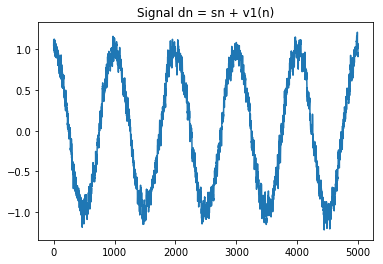

Text(0.5, 1.0, 'Signal sn + v1(n) - d^n')

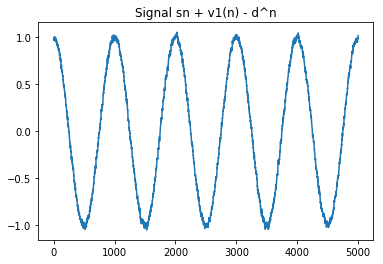

In [15]:
#%% Importing libraries and defining global constants:
import matplotlib.pyplot as plt
import numpy as np

nsamples  = 5000                                 #total data samples
var       = 0.0025                               #variance
mu, sigma = 0, var**0.5                          #mean and standard deviation
nn        = np.random.normal(mu,sigma,nsamples)  #gaussian noise
w0        = np.pi*(2e-3)                         #inital w0 guess
a1        = 0.8                                  #AR parameters asigned by 4.26
a2        = 0.7

#%%(a) Create 5000 sn:
sn    = np.zeros(nsamples)           #saving space for input signal sn
snres = np.zeros(nsamples)           #saving space for restored signal snres

for i in range(len(sn)):             #input signal sn
    sn[i] = np.cos(w0*i)

#%%(b) Create 5000 AR v1:
v1    = np.zeros(nsamples)     #initializing ARP that contamines the signal
v1[0] = nn[0]

for i in range(len(v1)):       #AR process contamining the signal
    if i != 0:
        v1[i] = a1 * v1[i-1] + nn[i]

#%%(c) Adding (a) and (b) to get dn
dn = sn + v1

#%%(d) Create 5000 AR v2:
v2    = np.zeros(nsamples)  #initializing ARP that contamines the signal
v2[0] = nn[0]

for i in range(len(v1)):    #AR process contamining the signal
    if i != 0:
        v2[i] = a1 * v2[i-1] + nn[i]

#%%(e) Solving for the optimum w
ak = np.array([1,a1,a2])                #vector of a1 and a2 coefficients
r2 = var/(1-a2**2)                      #eq 4.55 Theodoridis
p2 = var/(1-a2*a1)                      #eq 4.66 Theodoridis

cor2 =np.matrix([[r2*ak[0],r2*ak[2]],   #autocorrelation matrix from eq 4.55
                 [r2*ak[2],r2*ak[0]]])

P2 = np.matrix([[p2*ak[0]],             #cross-correlation matrix from eq 4.56
                [p2*ak[1]]])
    
invcor2 = np.linalg.inv(cor2)           #inverse of cor2
w = invcor2 * P2                        #finding W by solving normal eqs.
print(w)

snres[0] = dn[1] - w[0]*v2[1] -w[1]*v2[0]        #restored signal:
for i in range(len(snres)):             
    if i != 0:
        snres[i] = dn[i] - w[0]*v2[i] -w[1]*v2[i-1] 

#%%Plots
plt.plot(range(nsamples),dn)             #contaminated signal
plt.title('Signal dn = sn + v1(n)')
plt.show()
plt.plot(range(nsamples),snres)          #restored signal
plt.title('Signal sn + v1(n) - d^n')

## 4.28

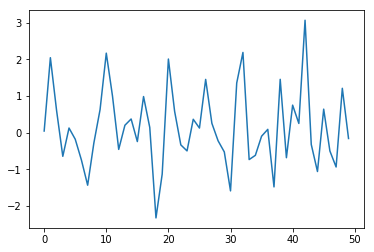

In [9]:
nsamples = 50
a1   = 0.2
a2   = 0.1
varn = 0.5
varv = 1.0
mu   = 0.0
sigman, sigmav = varn**0.5, varv**0.5
nn = np.random.normal(mu,sigman,nsamples)
vn = np.random.normal(mu,sigmav,nsamples)

#%%(a) Create 5000 sn:
xn    = np.zeros(nsamples)           #saving space for AR sequence xn

for n in range(len(xn)):
    if n==0:
        xn[n] =     xn[n]             +nn[n]       
    elif n==1:      
        xn[n] = -a1*xn[n-1]           +nn[n]
    else:
        xn[n] = -a1*xn[n-1]-a2*xn[n-2]+nn[n]
        
yn = xn + vn

F = np.matrix([[-a1, -a2],
               [1.0,  0.0]])
H = np.zeros(nsamples); H[0] = 1 
R = varv
Q = np.zeros((2,2)); Q[0,0] = varn

x_ini = np.matrix([[0],[0]])
p_ini = 0.2 * np.identity(2)


for i in range(nsamples):
    Sn = R + H

plt.plot(range(nsamples),yn)


## 5.18

In [10]:
p = np.array([[0.05],[0.03]])     #cross-correlation vector

cov1 = np.array([[1,0],[0,0.1]])    #covariance matrix 1
cov2 = np.array([[1,0],[0,1]])      #covariance matrix 2

eig1 = np.linalg.eigvals(cov1)      #eigenvalues cov matrix 1
eig2 = np.linalg.eigvals(cov2)      #eigenvalues cov matrix 2

inv_cov1 = np.linalg.inv(cov1)      #inverse cov matrix 1
inv_cov2 = np.linalg.inv(cov2)      #inverse cov matrix 2
 
theta1_opt = np.dot(inv_cov1,p)     #optimal solution theta1
theta2_opt = np.dot(inv_cov2,p)     #optimal solution theta2

miu1_opt = 2 / (max(eig1) + min(eig1)) #optimal step-size value 1 5.16
miu1 = miu1_opt / 2

miu2_opt = 2 / (max(eig2) + min(eig2)) #optimal step-size value 2
miu2 = miu2_opt / 2

N = 30
theta_ini = [100,100]
theta_a = theta_ini
theta_b = theta_ini
print('theta incial= ', theta_ini)

#%%a. Gradient descent with optimal step-size 
for i in range(N):
    theta_a += miu2_opt * (p - np.dot(cov2,theta_a))
    
print('theta final (optimal)= ', theta_a)
    
#%%b. Gradient descent with fixed step-size
for i in range(N):
    theta_b += miu2 * (p - np.dot(cov2,theta_b))
    
print('theta final (optimal)= ', theta_b)   

theta incial=  [100, 100]
theta final (optimal)=  [[0.05 0.05]
 [0.03 0.03]]
theta final (optimal)=  [[0.05000009 0.05000009]
 [0.03000009 0.03000009]]


## 5.19

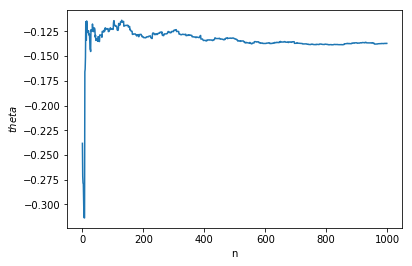

In [11]:
sigma   = 0.1**0.5     #variance
n       = 1000         #samples

theta_0 = np.random.normal(0,1,(2,1))     #initial estimate
eta_n   = np.random.normal(0,sigma,(n,1)) #Gaussian noise
x_n     = np.random.normal(0,1,(2,n))     #n inputs
y_n     = x_n.T @ theta_0 + eta_n         #n outputs

miu_n = 1/n                               #step-size

theta_n = theta_0

g_theta  = np.zeros(n)      
g_theta2 = np.zeros(n)

for i in range(n):   #Robbins-Monro algorithm (Eq 5.33)
    miu_n = 1/(i+1)
    z = y_n[i] - x_n[:,i].T @ theta_n
    x = miu_n*z * x_n[:,i]
    theta_n += x.reshape(2,1)*z
    g_theta[i]  = theta_n[0]
    g_theta2[i] = theta_n[1]
    
plt.plot(range(n),g_theta)
plt.xlabel('n')
plt.ylabel('$theta$')
plt.show()

## 5.20 , 5.21

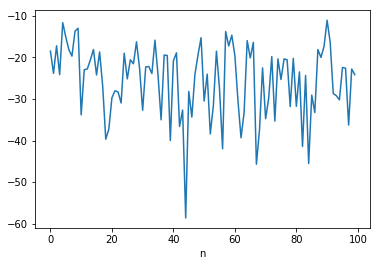

ValueError: non-broadcastable output operand with shape (10,1) doesn't match the broadcast shape (10,100)

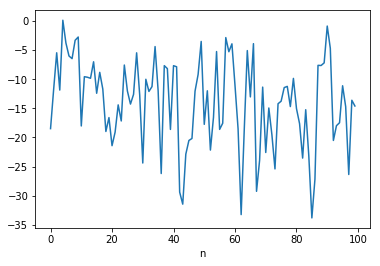

In [12]:
sigma   = 0.1**0.5   #variance
n       = 100        #samples
R       = 10         #samples dimention (R10)
miu     = 0.01       #step-size

#%% White noise sequence
theta_0 = np.random.normal(0,1,(R,1))   #initial estimate
eta_n   = np.random.normal(0,0.1,(n,1)) #Gaussian noise
x_n     = np.random.normal(0,1,(R,n))   #n inputs
y_n     = x_n.T @ theta_0 + eta_n       #n outputs

theta_n = theta_0.copy()
error = np.zeros(n)       #saving space por error vector

for i in range(n):        #LMS algorithm (Algorithm 5.2)
    e_n = y_n[i] - theta_n.T @ x_n[:,i]
    error[i] = e_n**2
    theta_n += miu*e_n*x_n[:,i].reshape(R,1)

plt.plot(range(n),10*np.log10(error))
plt.xlabel('n')
plt.show()

#%% AR(1)
a1 = 0.85                           #AR coefficient

x_n2 = np.zeros((R,n))          
x_n2[0:,0] = eta_n[0]               #first sample is 0 + noise
y_n2    = x_n2.T @ theta_0 + eta_n  #n outputs

theta_n = theta_0.copy()

for i in range(1,n):    #generating samples according to AR(1)
    x_n2[:,i] += eta_n[i]
    
for i in range(n):      #LMS algorithm (Algorithm 5.2)
    e_n = y_n2[i] - theta_n.T @ x_n2[:,i]
    error[i] = e_n**2
    theta_n += miu*e_n*x_n2[:,i].reshape(R,1)

plt.plot(range(n),10*np.log10(error))
plt.xlabel('n')

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%% 5.21 %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
delta = 0.01           #transform-domain LMS parameters
beta  = 0.5           
sigma_i = delta

for i in range(n):    #transform-domain LMS (Algorithm 5.6)
    e_n = e_n = y_n2[i] - theta_n.T @ x_n2[:,i]
    theta_n += miu*sigma_i*e_n*x_n2[:,i].reshape(10,1)
    sigma_i = beta*sigma_i + (1-beta)*(x_n2[i]**2)

## 5.22

In [ ]:
#%% NLMS
sigma   = 0.1**0.5  #variance
n       = 100       #samples
R       = 60        #samples dimention (R60)
miu     = 0.35      #step-size
delta   = 0.01      #transform-domain LMS parameter

theta_0 = np.random.normal(0,1,(R,1))   #initializing estimation vector
eta_n   = np.random.normal(0,0.1,(n,1)) #Gaussia noise

x_n2 = np.zeros((R,n))
x_n2[0:,0] = eta_n[0]                   #first sample is 0 + noise
y_n2    = x_n2.T @ theta_0 + eta_n      #n outputs

theta_n = theta_0.copy()    
error = np.zeros(n)                 #saving space for error vector

for i in range(1,n):        #generating samples according to AR(1)
    x_n2[:,i] += eta_n[i]
    
for i in range(n):          #NLMS algorithm (Algorithm 5.3)
    e_n = y_n2[i] - theta_n.T @ x_n2[:,i]
    coef = miu / (delta * x_n2[:,i].T @ x_n2[:,i])
    theta_n += coef*e_n*x_n2[:,i].reshape(R,1)
    error[i] = e_n

plt.plot(range(n),error)

#%%APA
q = 10                         #APA algorithm coefficient
X_n = np.zeros(q).reshape(q,1) #initalizing X_n matrix
 
for i in range(n):             #APA algorithm (Algorithm 5.2)
    X_n = np.zeros(q).reshape(q,1)
    for j in range(q):
        X_n[j] = x_n2[:,i-j+1]
        
    e_n = y_n2[i] - x_n2[:,i].T @ theta_n